In [1]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In this exapmle, the author tries to illustrate that if the shape of your priors are approximately the same, then your posterior distribution will not change dramatically:

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [s1]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 21 seconds.
The acceptance probability does not match the target. It is 0.8822930127008598, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [s2]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 21 seconds.


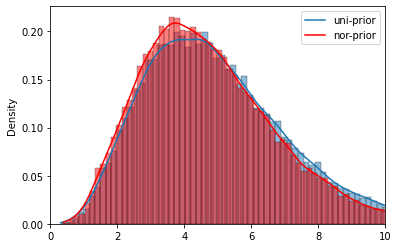

In [7]:
with pm.Model():
    s1 = pm.Uniform('s1',0,10**7)
    obs1 = pm.Poisson('obs1',mu = s1 ,observed = 4)
    trace = pm.sample(20000)
with pm.Model():
    s2 = pm.HalfNormal('s2',10)
    obs2 = pm.Poisson('obs2',mu = s2 ,observed = 4)
    trace3 = pm.sample(20000)

sns.histplot(trace['s1'], stat = 'density' , kde = 1)
sns.histplot(trace3['s2'], stat = 'density' , kde = 1, color = 'r')
plt.xlim(0,10)
plt.legend(['uni-prior','nor-prior'])
plt.show()